Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
import logging
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import cm
import random

In [2]:
def rastrigin(x, A=10, axis=1):
    """Rastrigin test function"""
    return -np.sum(A - A * np.cos(2 * np.pi * x) + x**2, axis=axis)


def sphere(x, axis=1):
    """Sphere test function"""
    return -np.sum(x**2, axis=axis)

## Sphere

In [3]:
problem = sphere
N_DIM = 2

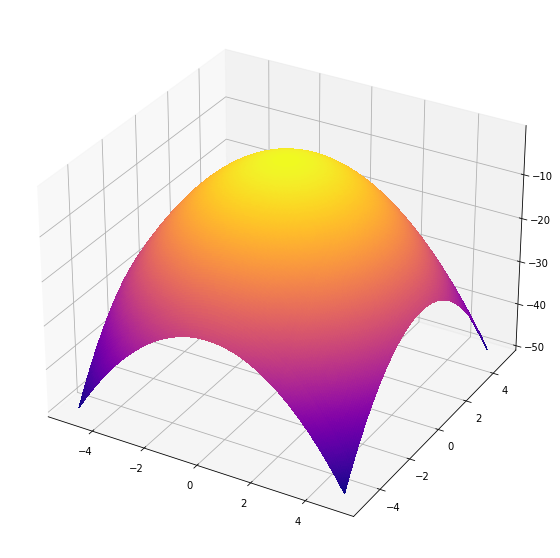

In [4]:
N_POINTS = 200
r = np.linspace(-5, 5, N_POINTS)

x = np.array(np.meshgrid(r, r))
z = problem(x, axis=0)
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.plot_surface(*np.meshgrid(r, r), z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)
None

### Hill Climbing

In [54]:
logging.basicConfig(level=logging.DEBUG)

In [96]:
def hill_climbing(starting_point, problem):
    """Hill climbing algorithm"""
    
    def tweak(solution):
        """Tweak the current solution by a small amount"""
        xy = []
        z = []
        #print(f"s {solution}")
        for i in range(10):
            x = solution[0] + random.uniform(-0.5, 0.5)
            y = solution[1] + random.uniform(-0.5, 0.5)
            xy.append(np.array([x, y]))
            z.append(problem(xy[i], axis=0))
            
        r_z = np.argmax(z)
        r_xy = xy[r_z]
        return r_xy    
    
    test = False
    i = 0
    solution = starting_point
    
    while i < 1000000000 and test == False:
        i += 1
        r = tweak(solution)
        #logging.debug(f"Current solution: {solution} , r: {r}")
        if i % 100000 == 0:
            logging.debug(f"Current solution: {solution}")
            logging.debug(f"Current iteration: {i}")
            logging.debug(f"sphere(solution, axis=0): {problem(solution, axis=0)}")
            logging.debug(f"sphere(last_solution, axis=0): {problem(r, axis=0)}\n\n")

        if problem(r, axis=0) > problem(solution, axis=0):
            solution = r
        
        if problem(solution, axis=0) < 0 and problem(solution, axis=0) > -10**-5:
            test = True        

    return solution, i

In [97]:
np.random.seed(42)


starting_point = np.random.random(2)
starting_point

array([0.37454012, 0.95071431])

In [98]:
sphere(starting_point, axis=0)

-1.0441379930386843

In [101]:
solution, i = hill_climbing(starting_point, problem)

print(f"Solution: {solution}\nPeak: {problem(solution,axis=0)}\nIterations: {i}\n")

Solution: [-0.00050693  0.00240757]
Peak: -6.05336806868649e-06
Iterations: 1434



## Rastrigin

In [102]:
problem = rastrigin
N_DIM = 2

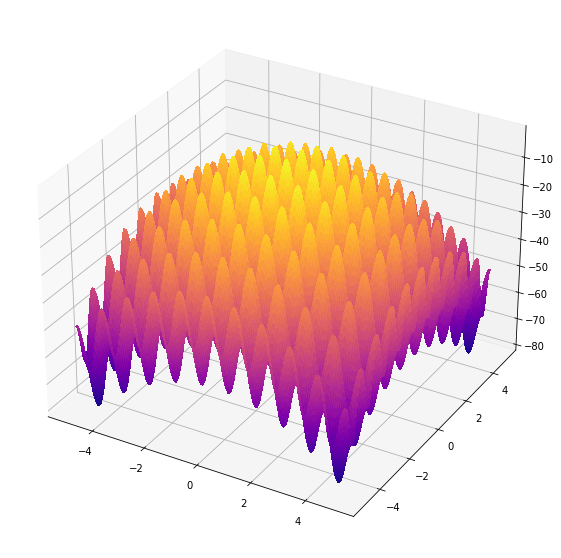

In [103]:
N_POINTS = 200
r = np.linspace(-5, 5, N_POINTS)

x = np.array(np.meshgrid(r, r))
z = problem(x, axis=0)
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.plot_surface(*np.meshgrid(r, r), z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)
None

In this case I added some lines to escape from a local maxima. First, I always keep a variable with the best solution. If I have the same solution unbeated for 100 iteration, I start from an other random point of the space.

In [114]:
def hill_climbing_rastr(starting_point, problem):
    """Hill climbing algorithm"""
    
    def tweak(solution):
        """Tweak the current solution by a small amount"""
        xy = []
        z = []
        #print(f"s {solution}")
        for i in range(10):
            x = solution[0] + random.uniform(-0.5, 0.5)
            y = solution[1] + random.uniform(-0.5, 0.5)
            xy.append(np.array([x, y]))
            z.append(problem(xy[i], axis=0))
            
        r_z = np.argmax(z)
        r_xy = xy[r_z]
        return r_xy    
    
    test = False
    i = 0
    cont = 0
    solution = starting_point
    best_solution = starting_point
    
    while i < 1000000 and test == False:
        i += 1
        r = tweak(solution)
        #logging.debug(f"Current solution: {solution} , r: {r}")
        if i % 100000 == 0:
            logging.debug(f"Current solution: {solution}")
            logging.debug(f"Current iteration: {i}")
            logging.debug(f"ratrigin(best_solution, axis=0): {problem(best_solution, axis=0)}")
            logging.debug(f"ratrigin(olution, axis=0): {problem(solution, axis=0)}")
            logging.debug(f"ratrigin(r, axis=0): {problem(r, axis=0)}\n\n")

        if problem(r, axis=0) > problem(solution, axis=0):
            solution = r
            cont = 0
            if problem(r, axis=0) > problem(best_solution, axis=0):
                best_solution = r
        else:
            cont += 1
            # if the solution is the same for 100 iterations, it starts from an other random point
            if cont == 100:
                solution = np.random.random(2)
                cont = 0
            
        
        if problem(solution, axis=0) < 0 and problem(solution, axis=0) > -10**-5:
            test = True        

    return best_solution, i

In [115]:
rastrigin(starting_point, axis=0)

-18.570405950829127

In [116]:
solution, i = hill_climbing_rastr(starting_point, problem)

print(f"Solution: {solution}\nPeak: {problem(solution,axis=0)}\nIterations: {i}\n")

DEBUG:root:Current solution: [ 0.01091145 -0.00189689]
DEBUG:root:Current iteration: 100000
DEBUG:root:ratrigin(best_solution, axis=0): -5.490748307847362e-05
DEBUG:root:ratrigin(olution, axis=0): -0.024325163240536546
DEBUG:root:ratrigin(r, axis=0): -9.217382785996513


DEBUG:root:Current solution: [1.00233278 0.01610823]
DEBUG:root:Current iteration: 200000
DEBUG:root:ratrigin(best_solution, axis=0): -3.837152785373711e-05
DEBUG:root:ratrigin(olution, axis=0): -1.0571792352212526
DEBUG:root:ratrigin(r, axis=0): -1.8690209896233598


DEBUG:root:Current solution: [0.02271256 0.01419018]
DEBUG:root:Current iteration: 300000
DEBUG:root:ratrigin(best_solution, axis=0): -3.837152785373711e-05
DEBUG:root:ratrigin(olution, axis=0): -0.14209203692872296
DEBUG:root:ratrigin(r, axis=0): -5.348995301265205




Solution: [ 3.87523565e-06 -2.22163573e-04]
Peak: -9.794947238476994e-06
Iterations: 349029

